In [2]:
import pandas as pd
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
data=pd.read_csv(boston_url)
print(data.head())

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

Median value of owner-occupied homes" provide a boxplot


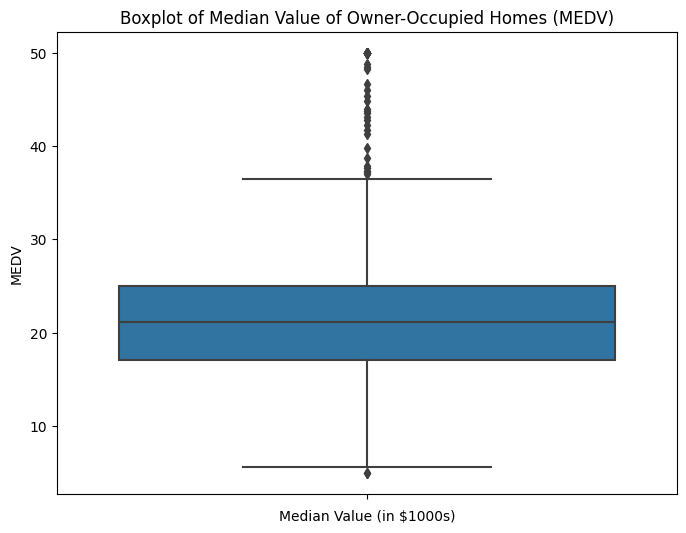

In [4]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='MEDV')
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.xlabel('Median Value (in $1000s)')
plt.show()

Provide a  bar plot for the Charles river variable


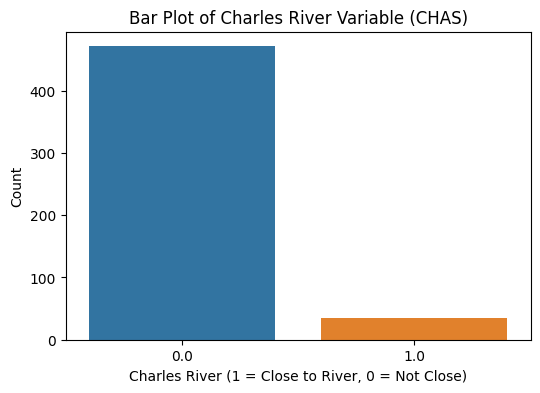

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='CHAS')
plt.title('Bar Plot of Charles River Variable (CHAS)')
plt.xlabel('Charles River (1 = Close to River, 0 = Not Close)')
plt.ylabel('Count')
plt.show()

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)




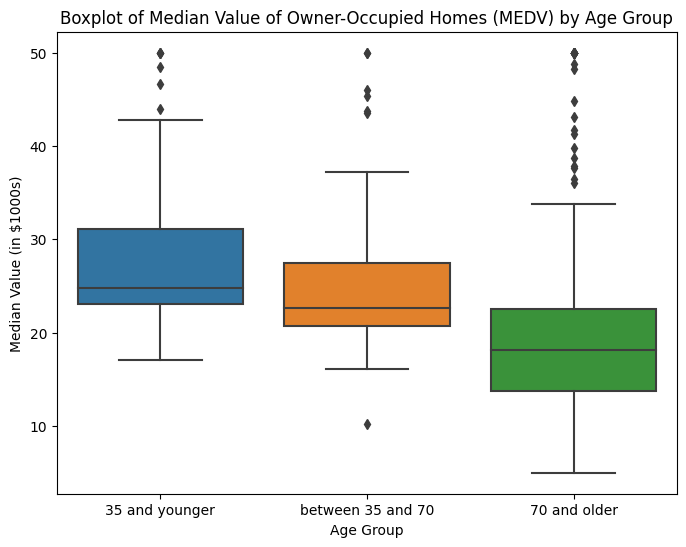

In [6]:
# Discretize the AGE variable into three groups
data['AGE_group'] = pd.cut(data['AGE'], bins=[0, 35, 70, 100], labels=['35 and younger', 'between 35 and 70', '70 and older'])

# Boxplot for MEDV variable vs AGE groups
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='AGE_group', y='MEDV')
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value (in $1000s)')
plt.show()

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?


Answer- The scatter plot shows a positive relationship between Nitric Oxide concentration (NOX) and the Proportion of Non-Retail Business Acres (INDUS), but it's not a perfect correlation, and other factors may influence NOX levels as well.

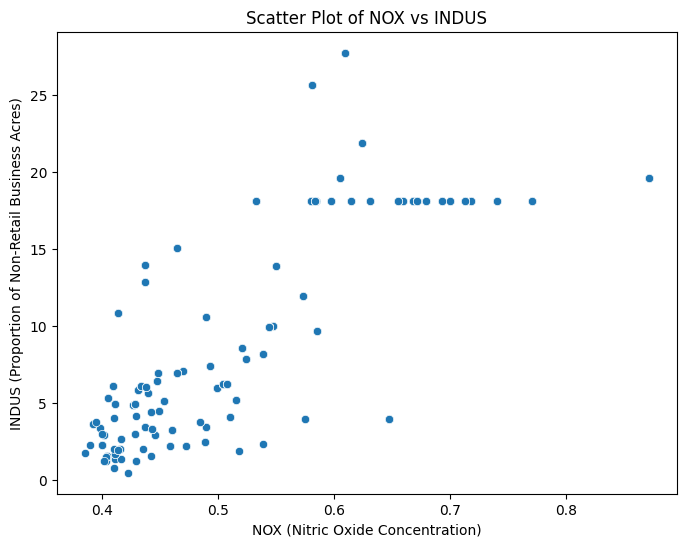

In [7]:
# Scatter plot for Nitric oxide concentrations (NOX) vs Proportion of non-retail business acres (INDUS)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='NOX', y='INDUS')
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('NOX (Nitric Oxide Concentration)')
plt.ylabel('INDUS (Proportion of Non-Retail Business Acres)')
plt.show()

Create a histogram for the pupil to teacher ratio variable


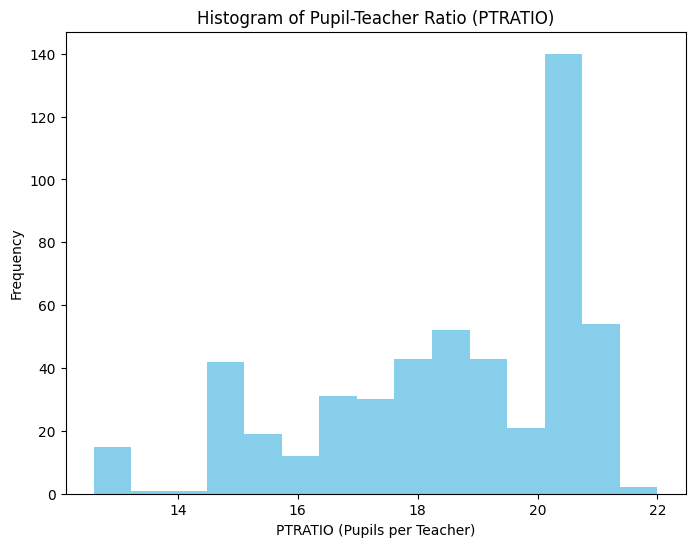

In [8]:
# Histogram for the pupil-teacher ratio (PTRATIO) variable
plt.figure(figsize=(8, 6))
plt.hist(data['PTRATIO'], bins=15, color='skyblue')
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('PTRATIO (Pupils per Teacher)')
plt.ylabel('Frequency')
plt.show()

1. Is there a significant difference in the median value of houses bounded by the Charles river or not? (T-test for independent samples)

Hypothesis:

Null Hypothesis (H0): There is no significant difference in the median values of houses bounded by the Charles river and those not bounded by the Charles river.


Alternative Hypothesis (H1): There is a significant difference in the median values of houses bounded by the Charles river and those not bounded by the Charles river.
Test: T-test for Independent Samples

We will conduct a two-sample t-test to compare the means of two independent groups.


In [9]:
from scipy.stats import ttest_ind

# Split the data into two groups: houses bounded by Charles river (CHAS = 1) and not bounded (CHAS = 0)
charles_river = data[data['CHAS'] == 1]['MEDV']
not_charles_river = data[data['CHAS'] == 0]['MEDV']

# Perform the t-test
t_stat, p_value = ttest_ind(charles_river, not_charles_river)

# Set the significance level
alpha = 0.05

# Conclusion
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in median values.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in median values.")


Reject the null hypothesis. There is a significant difference in median values.


2. Is there a difference in Median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE)? (ANOVA)

Hypothesis:

Null Hypothesis (H0): There is no significant difference in the median values of houses for different proportions of owner-occupied units built prior to 1940 (AGE).


Alternative Hypothesis (H1): There is a significant difference in the median values of houses for different proportions of owner-occupied units built prior to 1940 (AGE).
Test: Analysis of Variance (ANOVA)

We will conduct an ANOVA test to compare means across multiple groups.

In [11]:
from scipy.stats import f_oneway

# Group the data by AGE categories and get MEDV for each category
age_groups = [data[data['AGE'] < 40]['MEDV'], data[(data['AGE'] >= 40) & (data['AGE'] < 80)]['MEDV'], data[data['AGE'] >= 80]['MEDV']]

# Perform the ANOVA test
f_stat, p_value = f_oneway(*age_groups)

# Set the significance level
alpha = 0.05

# Conclusion
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in median values for different AGE categories.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in median values for different AGE categories.")



Reject the null hypothesis. There is a significant difference in median values for different AGE categories.


3. Can we conclude that there is no relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS)? (Pearson Correlation)

Hypothesis:

Null Hypothesis (H0): There is no significant correlation between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).


Alternative Hypothesis (H1): There is a significant correlation between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).
Test: Pearson Correlation

We will calculate the Pearson correlation coefficient to measure the strength and direction of the linear relationship.

In [12]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient and its p-value
correlation_coefficient, p_value = pearsonr(data['NOX'], data['INDUS'])

# Set the significance level
alpha = 0.05

# Conclusion
if abs(correlation_coefficient) >= alpha:
    print("Reject the null hypothesis. There is a significant correlation between NOX and INDUS.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between NOX and INDUS.")



Reject the null hypothesis. There is a significant correlation between NOX and INDUS.


4. What is the impact of an additional weighted distance to the five Boston employment centers (DIS) on the median value of owner-occupied homes (MEDV)?

(Regression Analysis)

Hypothesis:

We don't have a null and alternative hypothesis for regression analysis. Instead, we'll build a regression model to understand the relationship between DIS and MEDV.


Regression Analysis:

We will perform a regression analysis to estimate the impact of the weighted distance to employment centers (DIS) on the median value of owner-occupied homes (MEDV).

In [13]:
import statsmodels.api as sm

# Define the independent variable (DIS) and the dependent variable (MEDV)
X = data['DIS']
y = data['MEDV']

# Add a constant term to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the model summary
model_summary = model.summary()

# Print the model summary to understand the impact of DIS on MEDV
print(model_summary)


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 22 Oct 2023   Prob (F-statistic):           1.21e-08
Time:                        16:31:59   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0